In [107]:
import pandas as pd

In [108]:
import cx_Oracle

In [109]:
dsn = cx_Oracle.makedsn('localhost', 1521, 'xe')
print(dsn)

(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))


In [110]:
conn = cx_Oracle.connect('hotel','dbdb',dsn)
conn

<cx_Oracle.Connection to hotel@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>

In [111]:
cursor = conn.cursor()
print(cursor)

<cx_Oracle.Cursor on <cx_Oracle.Connection to hotel@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>>


In [112]:
sql ="""select mem_add as "고객의 지역",
               sum(res_adult+res_kid +res_baby) as "총 방문객 수"
        from member inner join reserve
                on(mem_inid = res_mem)
        group by mem_add"""
cursor.execute(sql)

<cx_Oracle.Cursor on <cx_Oracle.Connection to hotel@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>>

In [113]:
row = cursor.fetchall()
print(row)

[('대전광역시', 40), ('광주광역시', 51), ('경기도', 35), ('세종특별시', 45), ('서울특별시', 37), ('전라도', 23), ('부산광역시', 50), ('강원도', 35), ('충청도', 59), ('대구광역시', 42), ('인천광역시', 33), ('울산광역시', 16), ('경상도', 2)]


In [114]:
colname = cursor.description

In [115]:
cursor.close()

In [116]:
conn.close()

In [117]:
col = []
for i in colname:
    col.append(i[0])

In [118]:
bd = pd.DataFrame(row, columns = col)
bd

,고객의 지역,총 방문객 수
0,대전광역시,40
1,광주광역시,51
2,경기도,35
3,세종특별시,45
4,서울특별시,37
5,전라도,23
6,부산광역시,50
7,강원도,35
8,충청도,59
9,대구광역시,42


In [119]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == "Windows":
    path = "c:/Windows/Fonts/NanumSquareR.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
elif platform.system() == "Darwin":  # 맥인 경우 이쪽
    rc("font", family = "AppleGothic")
else:
    print("Check your Os system")
    
path = "c:/Windows/Fonts/NanumSquareR.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()

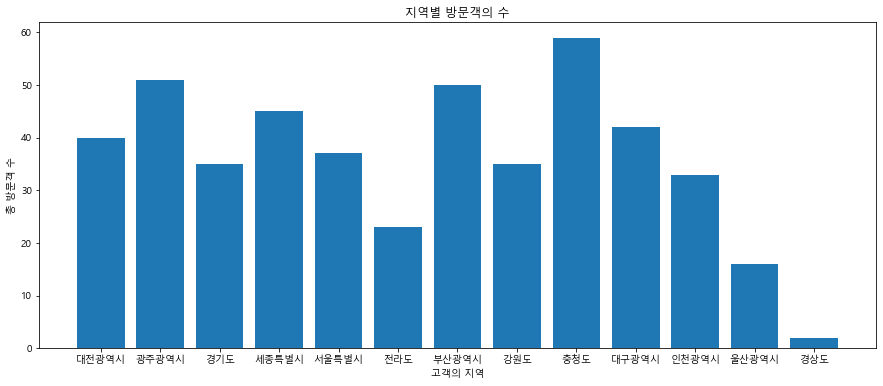

In [124]:
plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (15,6))
plt.bar(bd["고객의 지역"], bd["총 방문객 수"])
plt.title("지역별 방문객의 수")
plt.xlabel("고객의 지역")
plt.ylabel("총 방문객 수")
plt.savefig("local_visit.png")
plt.show()
